In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
htr = pd.read_csv('train.csv')
hte = pd.read_csv('test.csv')

# Drop the Id column
htr = htr.drop('Id', axis = 1)

In [3]:
htr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
htr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
htr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


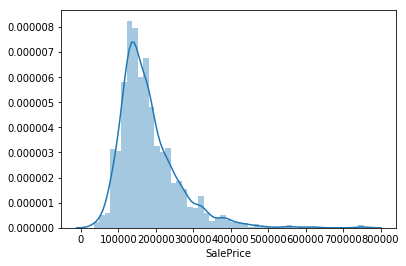

In [6]:
sns.distplot(htr['SalePrice'])

In [7]:
# Calculate Standard Deviation
np.std(htr['SalePrice'])

79415.29188606751

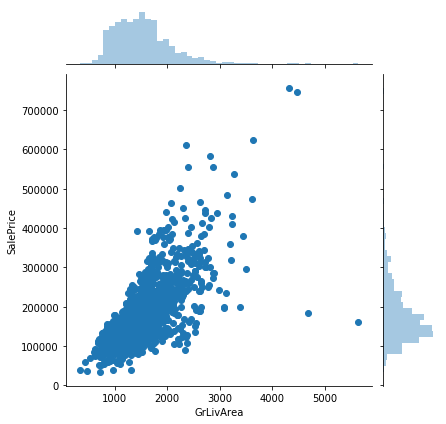

In [8]:
# Relationship between a continuous variable and SalePrice
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr, kind = 'scatter')

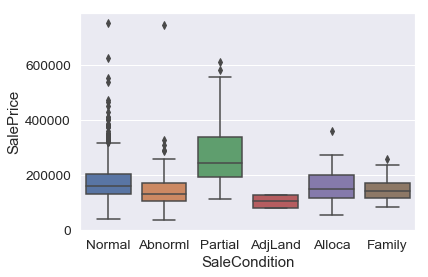

In [35]:
# Relationship between a categorical variable and SalePrice
sns.boxplot(x = 'SaleCondition',y = 'SalePrice', data = htr)

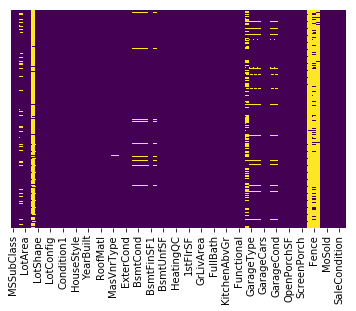

In [10]:
sns.heatmap(htr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

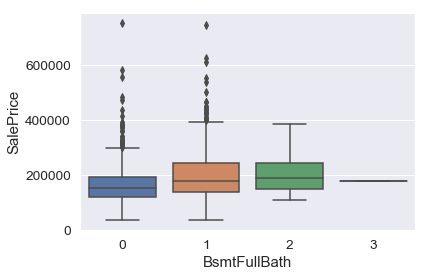

In [34]:
# Test Comparisons with Categorical Variables to SalePrice here
sns.boxplot(x = 'BsmtFullBath',y = 'SalePrice', data = htr)

C:\Users\Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


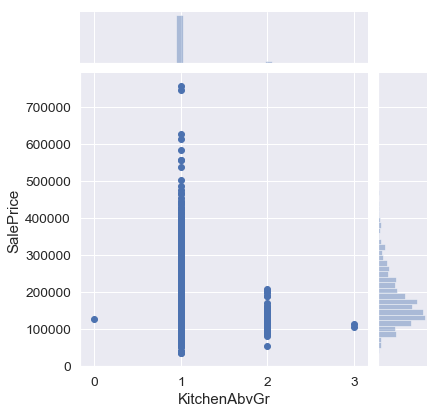

In [32]:
# Test Comparisons with Continuous Variables to SalePrice here
sns.jointplot(x = 'KitchenAbvGr', y = 'SalePrice', data = htr)

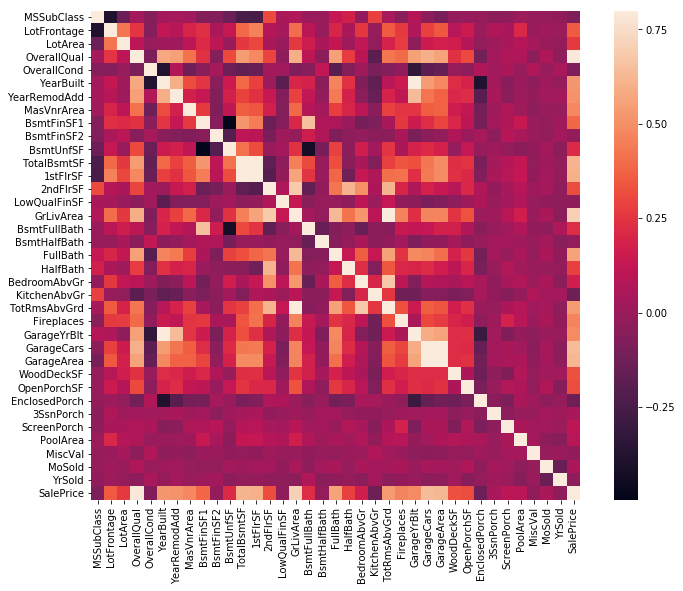

In [13]:
# Use heatmap to visualize correlation matrix
corrmat = htr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

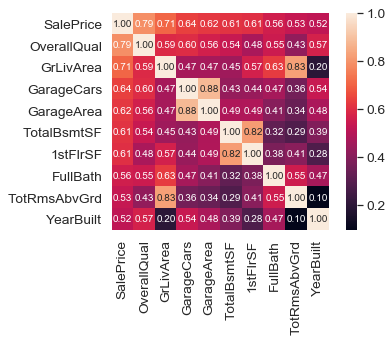

In [14]:
# Shortened correlation matrix for this data set. 10 x 10 matrix with percentages.
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(htr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
# Total all the missing data and percentage and sort it.
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [16]:
# Fill in missing data with appropriate values. Data Description that came with the data includes 'NA' for 'None'
# Pandas interpreted these 'NA' values to be null. Fill them in with 'None'
htr['PoolQC'] = htr['PoolQC'].fillna('None')
htr['MiscFeature'] = htr['MiscFeature'].fillna('None')
htr['Alley'] = htr['Alley'].fillna('None')
htr['Fence'] = htr['Fence'].fillna('None')
htr['FireplaceQu'] = htr['FireplaceQu'].fillna('None')
htr['GarageType'] = htr['GarageType'].fillna('None')
htr['GarageCond'] = htr['GarageCond'].fillna('None')
htr['GarageFinish'] = htr['GarageQual'].fillna('None')
htr['GarageQual'] = htr['GarageQual'].fillna('None')
htr['BsmtFinType2'] = htr['BsmtFinType2'].fillna('None')
htr['BsmtExposure'] = htr['BsmtExposure'].fillna('None')
htr['BsmtQual'] = htr['BsmtQual'].fillna('None')
htr['BsmtCond'] = htr['BsmtCond'].fillna('None')
htr['BsmtFinType1'] = htr['BsmtFinType1'].fillna('None')
htr['MasVnrType'] = htr['BsmtQual'].fillna('None')
# Fill the numerical value with 0
htr['GarageYrBlt'] = htr['GarageCond'].fillna(0)
htr['MasVnrArea'] = htr['MasVnrArea'].fillna(0)
# Assume that one missing Electrical value uses the standard circuit breaker
htr['Electrical'] = htr['Electrical'].fillna('SBrkr')

In [17]:
# Total up missing data again
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
LotFrontage,259,0.177397
SalePrice,0,0.000000
BsmtQual,0,0.000000


In [18]:
# LotFrontage appears to actually have some missing values. Not sure if we can just fill in 0 for this one.
# LotFrontage describes "Linear feet of street connected to property"
# Assume that houses in the same neighborhood have similar LotFrontages. Take median LotFrontage of houses in respective
# neighborhood. Fill in missing values with those.
htr["LotFrontage"] = htr.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [19]:
# No more missing data
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0


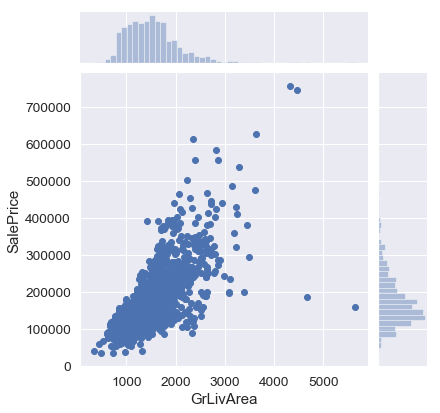

In [20]:
# Outlier analysis
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr, kind = 'scatter')

In [ ]:
# Feature Reduction/Addition

In [ ]:
# Encode Variables with Label/Dummy Encoding